In [204]:
import keras as ks, tensorflow as tf, numpy as np
import matplotlib.pyplot as plt

In [217]:
class DRMSprop(ks.optimizers.RMSprop):
    def __init__(self, learning_rate=0.001, rho=0.9, momentum=0, epsilon=1e-7, centered=False, weight_decay=None, clipnorm=None, clipvalue=None, global_clipnorm=None, use_ema=False, ema_momentum=0.99, ema_overwrite_frequency=None, loss_scale_factor=None, gradient_accumulation_steps=None, name="rmsprop", **kwargs):
        super().__init__(learning_rate, rho, momentum, epsilon, centered, weight_decay, clipnorm, clipvalue, global_clipnorm, use_ema, ema_momentum, ema_overwrite_frequency, loss_scale_factor, gradient_accumulation_steps, name, **kwargs)
    def scale_loss(self, loss):
        loss_len = len(str(int(loss.numpy())))
        #*a really dumb way to change rate dynamically
        #*thinking about adding tf.function for a better calculation of rate
        self.learning_rate = loss_len / 8.0 * 10.0
        return super().scale_loss(loss)

In [203]:
#*setting dynamic optimizer
RMSprop = ks.optimizers.RMSprop(0.1)
DRMSprop = DRMSprop(0.1)

#*some data for test
X = tf.cast(tf.linspace(-1000.0, 1000.0, 100), tf.float64)
Y = X + np.random.uniform(-100.0, 100.0)

#*one layer RMSprop model
mdl_RMSprop = ks.Sequential([ks.layers.Dense(1, input_shape=[1])])
mdl_RMSprop.compile(optimizer=RMSprop, loss=ks.losses.MeanSquaredError(), run_eagerly=True)

#*one layer DynamicRMSprop model
mdl_DRMSprop = ks.Sequential([ks.layers.Dense(1, input_shape=[1])])
mdl_DRMSprop.compile(optimizer=DRMSprop, loss=ks.losses.MeanSquaredError(), run_eagerly=True)

#*training
EPOCHS = 10
print('-'*24, "RMSprop", '-'*24)
stats_RMSprop = mdl_RMSprop.fit(X, Y, epochs=EPOCHS)
print('-'*24, "DRMSprop", '-'*24)
stats_DRMSprop = mdl_DRMSprop.fit(X, Y, epochs=EPOCHS)

------------------------ RMSprop ------------------------
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1778375.1250
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 833802.2500
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 417647.0938
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 217500.1719
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 97110.5234 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 41795.2148
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17008.1426
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7870.9419
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4139.4321
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3636.2717
------------------------ DRMSprop ------------------------
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 66393352.0000
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 230662.7656
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 96

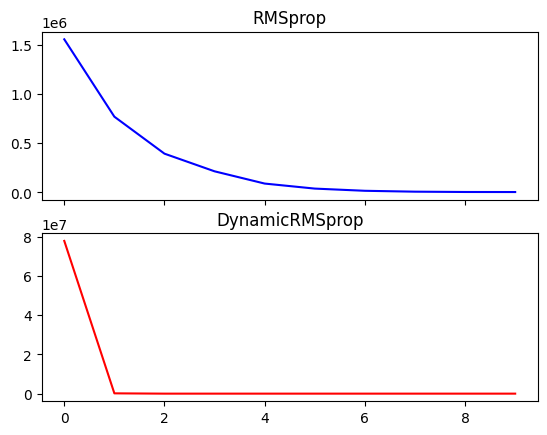

In [218]:
fig, axis = plt.subplots(2, sharex=True)
axis[0].plot(range(EPOCHS), stats_RMSprop.history["loss"], color="blue")
axis[0].set_title("RMSprop")
axis[1].plot(range(EPOCHS), stats_DRMSprop.history["loss"], color="red")
axis[1].set_title("DynamicRMSprop")
plt.show()